<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразоШипунов В.Ю.вании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошо, когда есть небольшое описание проекта — так будет проще разобраться!
    
</div>

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Необходимые библиотеки импортированы, все хорошо
    
</div>

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head() 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
data.duplicated().sum()

153

In [7]:
data['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [8]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


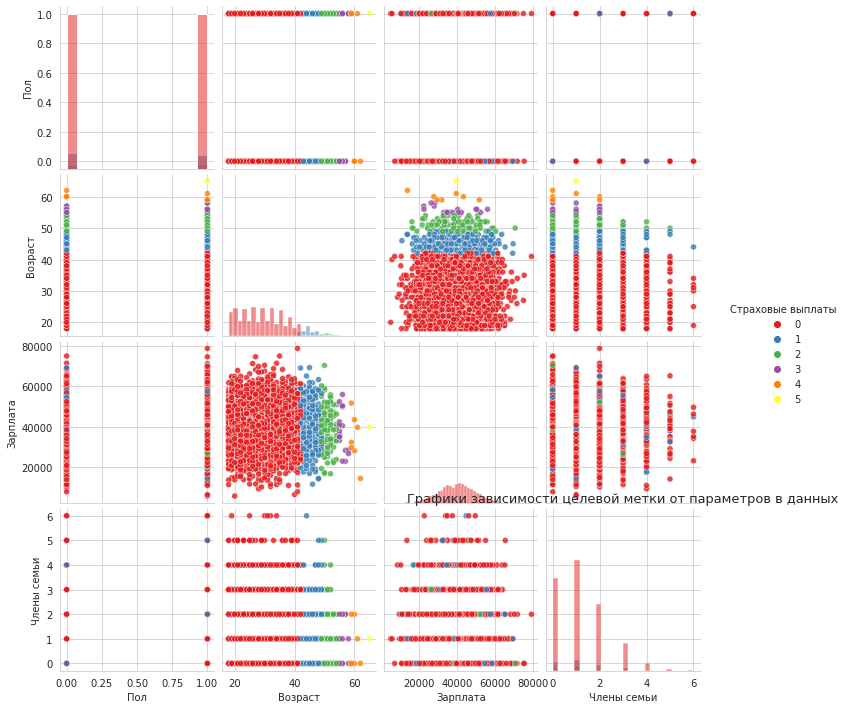

In [9]:
sns.set_style('whitegrid')
# sns.color_palette("Set2")
# sns.color_palette("hls", 8)
sns.pairplot(data, hue='Страховые выплаты', diag_kind='hist', plot_kws={'alpha':0.8},palette ="Set1")
plt.title("Графики зависимости целевой метки от параметров в данных", fontsize=13)
plt.show()

 Визуально ввыбросов не наблюдается, пропусков тоже
- Пол : Примерно 50/50 мужчин и женщин
- Медианное значение возрасата 37 лет, среднее 30. Распределение скошено влево.
- По зарплате распределение близко к нормальному.
-  В семье в среднем 1,1 член семьи, но медианное значение равно 1. 
- страховые выплаты. 4436 человек не получали никогда страховых выплат, 423 - одни раз, 115 -чел. 2 раза и тд. Один клиент получил выплаты целых 5 раз

Выделим целевой признак и разделим данные на тренировочную и тестовую выборку

In [10]:
features=data.drop(['Страховые выплаты'],axis=1)
target=data['Страховые выплаты']

In [11]:
train_features, test_features, train_target, test_target = train_test_split(
    features,target, test_size=0.25, random_state=12345)

In [12]:
tf=train_features.shape[0]/features.shape[0]
tt=test_target.shape[0]/target.shape[0]

print(f'Размер тренировочной выборки- {tf:.0%}')
print(f'Размер тестовой выборки - {tt:.0%}')

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


## Умножение матриц

In [13]:
# Из курса Залача 5.3 - Sample
# features = data.drop('цена', axis=1)
# target = data['цена']

# class LinearRegression:
#     def fit(self, train_features, train_target):
#         X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
#         y = train_target
#         w = np.linalg.inv(X.T.dot(X)).dot(X.T) .dot(y)# < напишите код здесь >
#         self.w = w[1:]
#         self.w0 = w[0]

#     def predict(self, test_features):
#         return test_features.dot(self.w) + self.w0

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$



In [14]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@(X.T)@y# < напишите код здесь >
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [15]:
model = LinearRegress()
model.fit(train_features, train_target)
predictions = model.predict(test_features)

R2_score = r2_score(test_target, predictions)
MSE = mean_squared_error(predictions,test_target)

print(f'R2_score: {R2_score}')
print(f'MSE: {MSE}')

R2_score: 0.4352275712702667
MSE: 0.11660517472525564


Вычислим значения R2 и MSE с помощью модели линейной регрессии из Scikit-learn

In [16]:
model_l = LinearRegression()
model_l.fit(train_features,train_target)
predictions= model_l.predict(test_features)

R2_score_l = r2_score(test_target, predictions)
MSE_l = mean_squared_error(predictions,test_target)

print(f'R2_score Линейной регрессии из Scikit-learn неизменённой матрицы: {R2_score_l}')
print(f'MSE Линейной регрессии из Scikit-learn неизменённой матрицы: {MSE_l}')

R2_score Линейной регрессии из Scikit-learn неизменённой матрицы: 0.43522757127026546
MSE Линейной регрессии из Scikit-learn неизменённой матрицы: 0.11660517472525592


Произведём изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу

In [17]:
rand_matrix=np.random.normal(5, size=(4,4))
rand_matrix

array([[4.49850873, 4.61963516, 4.90916153, 5.89870382],
       [6.69321784, 3.65332735, 6.2640646 , 5.21792142],
       [6.16443015, 3.48893454, 4.7727673 , 5.17582116],
       [4.62493842, 5.6866703 , 5.39161036, 3.08686009]])

Проверим обратимость нашей матрицы

In [18]:
np.linalg.inv(rand_matrix)

array([[-0.42109749, -0.30557397,  0.73628253,  0.0866653 ],
       [ 0.01372431, -0.5103831 ,  0.32347525,  0.2941284 ],
       [ 0.1374825 ,  0.83697171, -0.96700416, -0.0561025 ],
       [ 0.36550159, -0.06381375, -0.01005838, -0.24975221]])

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Все хорошо, матрица является обратимой
    
</div>

Произведём умножение признаков для тренировочной выборки на произвольную матрицу

In [19]:
train_features_matrix=train_features@rand_matrix
train_features_matrix.columns = train_features.columns
train_features_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
3369,223449.303069,126466.829785,173053.831926,187598.082032
1441,355303.244276,201091.462357,275129.284023,298310.606618
571,253576.886875,143517.802803,196366.577839,212896.309857
225,278261.380327,157488.154278,215482.703311,233620.466167
2558,312150.291410,176672.020945,241719.522895,262074.915621


Произведём умножение признаков для тестовой выборки на произвольную матрицу

In [20]:
test_features_matrix = test_features@rand_matrix
test_features_matrix.columns = test_features.columns
test_features_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,240652.151603,136211.753604,186366.205398,202041.563931
1071,266030.850025,150567.118448,206030.257219,223344.961615
2640,259788.043116,147031.243600,201182.711146,218111.468307
2282,214656.033408,121487.988592,166217.583444,180222.934657
1595,246870.127491,139729.914764,191189.085218,207259.128459


Посчитаем результат по измененным данным

In [21]:
model_ch = LinearRegress()
model_ch.fit(train_features_matrix, train_target)
predictions_ch = model_ch.predict(test_features_matrix)

R2_score_ch = r2_score(test_target, predictions_ch)
MSE_ch = mean_squared_error(predictions_ch,test_target)

print(f'R2_score по измененным данным: {R2_score_ch}')
print(f'MSE по измененным данным: {MSE_ch}')

R2_score по измененным данным: 0.43522756260980855
MSE по измененным данным: 0.11660517651332848


**Ответ:** 
Если признаки исходных данных умножить на обратимую матрицу, то качество линейной регрессии не изменится....

**Обоснование:** 
Изменение качества предсказания линейной регрессии не происходит при умножении признаков исходных данных, на обратимую матрицу, т.к. параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. По результату скалярного умножения создаётся число, на которое умножается тестовая выборка, и если эта выборка была преобразована умножением на ту же матрицу, то качество предсказания не изменится.


## Алгоритм преобразования

**Алгоритм**

 - Создаём произвольную матрицу
 - Проверяем её на обратимость
 - Умножаем DataSet на произвольную матрицу
 - Вычисляем R2score  и MSE  на исходных данных и на преобразованных
 - Проверяем способность восстановить данные с помощью умножения на матрицу 
 - Сравниваем метрики для линейной регрессии на оригинальных и преобразованных данных.

<div class="alert alert-success">
<b>✔️ Комментарий ревьювера:</b> Хорошее описание алгоритма!
    
</div>

**Обоснование**

Если умножить признаки тренировочной и тестовой выборок на одну и ту же обратимую матрицу, то результатом предсказания будет произведение изменённой таблицы с признаками на вектор, который был получен из той же таблицы с изменёнными данными увеличенную на ту же величину, что и признаки тренировочных данных. Проверим работу данного алгоритма в следующей главе.

**Математическое обоснование Алгоритма**


При матричном умножении (англ. matrix multiplication) по двум матрицам строится третья. Она состоит из скалярных произведений строк первой матрицы на столбцы второй. Так результатом произведения i-й строки матрицы A (Ai) на j-й столбец матрицы P (Pj) станет элемент матрицы С c индексами i, j (Mij):

$$
Mij = (Ai, Pj)
$$

Умножение матрицы на матрицу возможно, если ширина первой матрицы $А(m×n)$ равна высоте второй матрицы P(n×r). Тогда размер произведения этих матриц будет m×r. Размерность n «cхлопывается».


**Свойства матриц**

$$
(AB)^T = B^T A^T
$$

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

При умножении признаков выборки A размерностью (5000, 4) на обратимую произвольную матрицу P c размерностью (4, 4), получается  новый  набор данных скалярных произведений M с размернотью (5000, 4)

В каждую новую ячейку записывается результат сложения произведений строки i на столбец j. Так, например, в первой ячейке новой таблицы будет записан результат по этой формуле:


$$
M11=A11×P11+A12×P21+A13×P31+A14×P41
$$

Далее вычисляется  вектор w  по формуле:
 
$$
w = (X^T X)^{-1} X^T y
$$

В которой X - таблица признков, где нулевой столбец заполнен 1 (единицами), а y - вектор целевого признака


$$
Xi=(1Mi2Mi3Mi4Mi5)
$$

В Линейной регрессии предсказания вычисляются по формуле:

$$
a=Xw+w0
$$

где w0 - значение нулевого аргумента вектора w, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения MSE

Рассмотрим упрощённую запись формулы предсказания Линейной регрессии a=Xiw, где Xi - новые строки признаков
Подставим вместо параметра w, формулу её вычисления:

$$
a=Xiw=Xi(X^T X)^{−1}X^T y
$$

Упроситим формулу используя принцип ассоциативности $ A(BC)=(AB)C$ и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке $(AB)^T = B^T A^T:$

$$
a=Xi(X^TX)^{−1}XTy=XiX^{−1}(XT)^{−1}XT y=XiX^{−1}y
$$


Домножим наши признаки на случайную матрицу P, в которой число строк равно чилу столбцов X и P - обратима, то есть из матрицы P можно получить матрицу $ P^{−1}$, при этом $P P^{−1}=E$, где E  - единичная матрица

Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты w′

$$
w′=((XP)^T(XP))^{−1}(XP)^Ty
$$

Подставим их в формулу предсказания и упростим выражение
$$
a′=XiPw′=XiP((XP)^T(XP))^{−1}(XP)^Ty=XiP(XP)^{−1}((XP)^T)^{−1}(XP)^Ty=XiX^{−1}y
$$


Таким образом, результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов преобразований очевидно, что a = a′


$$
w = (X^T X)^{-1} X^T y
$$

Домножим на P

$$
w_n = ((X P)^T (X P))^{-1} (X P)^T y
$$


С учетом $(AB)^T = B^T A^T$

$$
w_n = (P^T X^T X P))^{-1} P^T X^T  y
$$

$$
w_new = (P^T X^T X P))^{-1} P^T X^T  y
$$

$$
w_n = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T  y
$$

$$
w_n = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T  y
$$


$ (P^T)^{-1} P^T = E$, отсюда:

$$
w_n = P^{-1} (X^T X)^{-1} X^T  y
$$

Таким образом:
$$
w_n = P^{-1} w
$$

$$
w_n = P^{-1} (X^T X)^{-1} X^T  y
$$


Подставим в формулу предсказаний $a=Xw$ матрицу $X_n = XP $ и w_n. Тогда
 
$$
a_n = XP w_n  = X P P^{-1} w = a
$$ 

## Проверка алгоритма

Создадим матрцу P и проверим ее на обратимость

In [22]:
P = np.random.normal(5, size=(4,4))
P

array([[5.55477053, 4.21597831, 5.44272306, 3.83530343],
       [5.79120764, 6.06298291, 3.91646445, 6.88384488],
       [3.90445004, 5.23296292, 2.77893945, 7.13809548],
       [5.35909326, 2.31140947, 5.19138425, 4.18008719]])

In [23]:
np.linalg.inv(P)

array([[-0.61351236,  1.07502806, -0.88682513,  0.30691275],
       [ 0.46088112, -0.02490369,  0.07041624, -0.50210044],
       [ 0.62630136, -0.93206967,  0.61512236, -0.09010216],
       [-0.24611593, -0.20690507,  0.33407945,  0.23529189]])

Умножим признаки на новую матрицу и обозначим её M

In [24]:
M =train_features.dot(P)
M.columns = train_features.columns
M.head()

,Пол,Возраст,Зарплата,Члены семьи
3369,141601.027290,189700.493294,100776.650344,258703.076959
1441,225098.778213,301629.021490,160205.515114,411392.185459
571,160663.574438,215271.102804,114344.929841,293600.187195
225,176304.539434,236227.206408,125476.353518,322180.104480
2558,197767.000132,264992.624920,140753.962511,361423.158151


Умножим тестовые данные на матрицу M

In [25]:
test_M = test_features.dot(P)
test_M.columns = test_features.columns
test_M.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,152486.097838,204294.877886,108528.647603,278629.610802
1071,168582.075351,225848.473742,119978.496495,308004.467443
2640,164608.758610,220548.411171,117151.535886,300786.124802
2282,135990.685592,182228.369214,96785.422318,248543.399469
1595,156436.877541,209576.344668,111338.918774,285822.777037


 в нулевой столбец изменённой таблицы вносим значение 1

In [26]:
X = np.concatenate((np.ones((M.shape[0], 1)), M), axis=1)

In [27]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,141601.027290,189700.493294,100776.650344,258703.076959
1,1.0,225098.778213,301629.021490,160205.515114,411392.185459
2,1.0,160663.574438,215271.102804,114344.929841,293600.187195
3,1.0,176304.539434,236227.206408,125476.353518,322180.104480
4,1.0,197767.000132,264992.624920,140753.962511,361423.158151


Присвоим переменной у целевые признаки и найдем вектор w

In [28]:
y = train_target
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

Вычислим переменную предсказанных значений a

In [29]:
a = test_M.dot(w[1:]) + w[0]

Рассчитаем R2 и MSE

In [30]:
R2_score_m=r2_score(test_target, a)
MSE_m=mean_squared_error(a, test_target)
print(f'R2_score: {R2_score_m}')
print(f'MSE: {MSE_m}')


R2_score: 0.43522756697428866
MSE: 0.11660517561222046


In [31]:
tabl = pd.DataFrame(index=['R2_score','MSE'], columns=['Изменённая матрица','Неизменённая матрица'])
tabl['Изменённая матрица'] = R2_score_m, MSE_m
tabl['Неизменённая матрица'] = R2_score_l, MSE_l

tabl

,Изменённая матрица,Неизменённая матрица
R2_score,0.435228,0.435228
MSE,0.116605,0.116605


Умножение признаков на обратимую квадратную матрицу не повлияло на качество модели. Данные успешно зашифрованы. В то же время, это позволяет нам успешно предсказывать для каждого клиента количество страховых выплат.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования